## Observations and Insights

Pymaceuticals Inc. has made recent efforts to create a drug that will help reduce tumors. They have done significant lab testing on 249 mice with 9 different experimental treatments, resulting in 1,893 data points over the various time points. Below are some observations from the analysis on the testing data:

-The gender distribution of 249 mice was nearly identical (125 Male, 124 Female)

-Capomulin (40.67/41.55) and Ramicane (40.21/40.67) had the lowest mean and median tumor volumes as well as the lowest standard error of means (.32 for both treatments)

-To help support the observation above, although there were 24-25 mice that were selected to test each drug, the drugs Capomulin and Ramicane had significantly more data points over time than the other drugs, perhaps implying that the mice taking these treatments were able to live longer than the mice taking the other experimental treatments.

-Of the 4 most promising drug treatments, Capomulin has the smallest Interquartile range (7.7)

-One mouse selected at random (ID l509) which was treated with Capomulin, saw an initial increase in tumor size over the first 20 Timepoints (45-48 mm3), then saw a rapid decrease (40.2 mm3 at Timepoint 35), however the tumor began to grow again until the end of the testing period

-There is a significant positive correlation (.84) between a mouse's weight and the average tumor size (mm3). The average weight of the mice taking Capomulin (20.1) and Ramicane (20), was significantly less than the mice taking the other treatements, which could explain the smaller average tumor volumes for the mice taking these treatments vs their counterparts and dispel the promises results mentioned above. 

-The sharp decrease in tumor volume for mouse l509 may be an outlier, as there was also evidence the tumor began to grow again in size towards the end of Timepoint 45.

-Would like to see Capomiulin and Ramicane tested on mice who weigh the same as the mice who took the other treatments for a more equitable analysis


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
import sklearn.datasets as dta


# Identify data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset and show first 5 rows

mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_median = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_variance = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_std = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_sem = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean":drug_mean,"Median":drug_median,"Variance":drug_variance,"Std. Dev":drug_std,"SEM":drug_sem})
drug_summary

,Mean,Median,Variance,Std. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

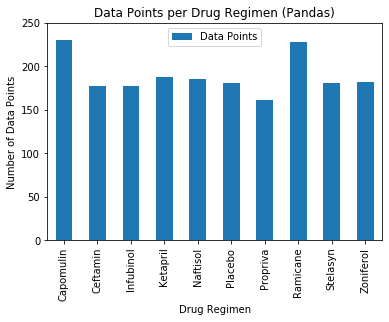

<Figure size 720x216 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using Pandas

#Create DataFrame pulling in Drug Regimen and Mouse ID for counts
mouse_study_pandabar = mouse_study[["Drug Regimen","Mouse ID"]]

#Rename Mouse ID Column to Data Points
mouse_study_pandabar = mouse_study_pandabar.rename(columns={"Mouse ID":"Data Points"})

#Create Bar Graph Grouping by Drug Regiment and add limits and titles
mouse_study_pandabar.groupby("Drug Regimen").count().plot(kind='bar')
plt.ylim(0,250)
plt.title("Data Points per Drug Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.figure(figsize=(10,3))

#Show Bar Graph

plt.show()

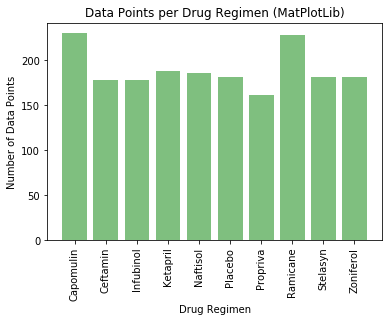

<Figure size 720x216 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using MatPlotLib

#Set Index

bar_regimen = pd.DataFrame(mouse_study.groupby(["Drug Regimen"]).count().reset_index())

#Determine x Axis Tick Marks and Labels for bar chart
x_axis = np.arange(len(drug_summary))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_regimen['Drug Regimen'], rotation="vertical")

#Determine Y Axis and change Column Header from Mouse ID to Data Points for Chart
bar_regimen = bar_regimen[["Drug Regimen","Mouse ID"]]
bar_regimen = bar_regimen.rename(columns={"Mouse ID":"Data Points"})
bar_regimen = bar_regimen.set_index("Drug Regimen")

#Create Bar Graph and Apply Variables

plt.bar(x_axis, bar_regimen["Data Points"], color='green', alpha=0.5, align="center")

#Set Title X and Y Axis Labels
plt.title("Data Points per Drug Regimen (MatPlotLib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.figure(figsize=(10,3))

plt.show()

## Pie plots

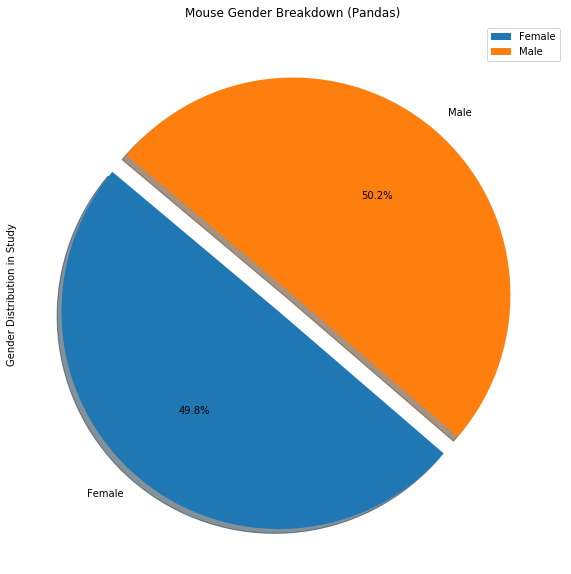

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Based on 1 record for each mouse tested, not datapoints

mouse_study_pandapie = mouse_metadata[["Sex","Mouse ID"]]

#Rename Mouse ID Column to Gender Distribution in Study
mouse_study_pandapie = mouse_study_pandapie.rename(columns={"Mouse ID":"Gender Distribution in Study"})
explode = (0.1,0)

#Create Pie Chart

mouse_study_pandapie.groupby("Sex").count().plot(kind='pie',subplots=True,shadow=True,explode=explode,figsize=(10,10),startangle=140,autopct='%1.1f%%')
plt.title("Mouse Gender Breakdown (Pandas)")

#Show Pie Chart
plt.show()

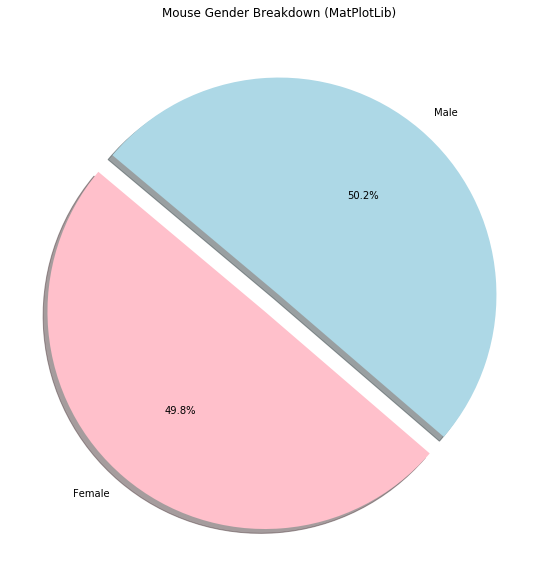

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Gather Data from original merged dataframe, grouping by Sex and getting counts of data points
gender_df = pd.DataFrame(mouse_metadata.groupby(["Sex"]).count().reset_index())
gender_df.head()

#Identify pie chart settings

colors = ["pink","lightblue"]
explode = (0.1,0)
values = mouse_metadata.groupby("Sex").count()["Mouse ID"].values
genders = mouse_metadata.groupby("Sex").count()['Mouse ID'].index
plt.figure(figsize=(10,10))

#Create pie chart and title
plt.pie(values,labels=genders,colors=colors,explode=explode,shadow=True, autopct="%1.1f%%",startangle=140)
plt.title("Mouse Gender Breakdown (MatPlotLib)")

plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens (Capomulin, Ramicane, Infubinol, Ceftamin). Calculate the IQR and quantitatively determine if there are any potential outliers.

#Create dataframe showing the final tumor volume of each mouse by using the max Timepoint for each mouse ID
mouse_final_tumor = mouse_study.loc[mouse_study.groupby("Mouse ID").Timepoint.idxmax()]

#Rename Timepoint and Tumor Volume to Final Timepoint and Final Tumor Volume (mm3)
mouse_final_tumor = mouse_final_tumor.rename(columns={"Timepoint":"Final Timepoint","Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
mouse_final_tumor.head()

#Create 4 Dataframes to help analyze each of the 4 most promising treatment regimens
Capomulin_final_df = mouse_final_tumor.loc[mouse_study["Drug Regimen"] == "Capomulin"]
Ramicane_final_df = mouse_final_tumor.loc[mouse_study["Drug Regimen"] == "Ramicane"]
Infubinol_final_df = mouse_final_tumor.loc[mouse_study["Drug Regimen"] == "Infubinol"]
Ceftamin_final_df = mouse_final_tumor.loc[mouse_study["Drug Regimen"] == "Ceftamin"]


In [8]:
#Shrink dataframes down to only have Final Tumor Volume

Capomulin_final_tumor_df = Capomulin_final_df["Final Tumor Volume (mm3)"]
Ramicane_final_tumor_df = Ramicane_final_df["Final Tumor Volume (mm3)"]
Infubinol_final_tumor_df = Infubinol_final_df["Final Tumor Volume (mm3)"]
Ceftamin_final_tumor_df = Ceftamin_final_df["Final Tumor Volume (mm3)"]


In [9]:
#Calculate quartiles, IQR and lower/upper bound for Capomulin Final Tumor Volumes and print results

cap_quartiles = Capomulin_final_tumor_df.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5 * cap_iqr)
cap_upper_bound = cap_upperq + (1.5 * cap_iqr)

print(f"The lower quartile for Capomulin final tumor volume is: {cap_lowerq}")
print(f"The median for Capomulin final tumor volume is: {cap_quartiles[0.5]}")
print(f"The upper quartile for Capomulin final tumor volume is: {cap_upperq}")
print(f"The interquartile range for Capomulin final tumor volume is: {cap_iqr}")
print(f"Any values below {cap_lower_bound} for Capomulin final tumor volume could be outliers.")
print(f"Any values above {cap_upper_bound} for Capomulin final tumor volume could be outliers.")



The lower quartile for Capomulin final tumor volume is: 32.37735684
The median for Capomulin final tumor volume is: 38.125164399999996
The upper quartile for Capomulin final tumor volume is: 40.1592203
The interquartile range for Capomulin final tumor volume is: 7.781863460000004
Any values below 20.70456164999999 for Capomulin final tumor volume could be outliers.
Any values above 51.83201549 for Capomulin final tumor volume could be outliers.


In [10]:
#Calculate quartiles, IQR and lower/upper bound for Ramicane Final Tumor Volumes and print results

ram_quartiles = Ramicane_final_tumor_df.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5 * ram_iqr)
ram_upper_bound = ram_upperq + (1.5 * ram_iqr)

print(f"The lower quartile for Ramicane final tumor volume is: {ram_lowerq}")
print(f"The median for Ramicane final tumor volume is: {ram_quartiles[0.5]}")
print(f"The upper quartile for Ramicane final tumor volume is: {ram_upperq}")
print(f"The interquartile range for Ramicane final tumor volume is: {ram_iqr}")
print(f"Any values below {ram_lower_bound} for Ramicane final tumor volume could be outliers.")
print(f"Any values above {ram_upper_bound} for Ramicane final tumor volume could be outliers.")

The lower quartile for Ramicane final tumor volume is: 31.56046955
The median for Ramicane final tumor volume is: 36.56165229
The upper quartile for Ramicane final tumor volume is: 40.65900627
The interquartile range for Ramicane final tumor volume is: 9.098536719999998
Any values below 17.912664470000003 for Ramicane final tumor volume could be outliers.
Any values above 54.30681135 for Ramicane final tumor volume could be outliers.


In [11]:
#Calculate quartiles IQR, and lower/upper bound for Infubinol Final Tumor Volumes and print results

inf_quartiles = Infubinol_final_tumor_df.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5 * inf_iqr)
inf_upper_bound = inf_upperq + (1.5 * inf_iqr)

print(f"The lower quartile for Infubinol final tumor volume is: {inf_lowerq}")
print(f"The median for Infubinol final tumor volume is: {inf_quartiles[0.5]}")
print(f"The upper quartile for Infubinol final tumor volume is: {inf_upperq}")
print(f"The interquartile range for Infubinol final tumor volume is: {inf_iqr}")
print(f"Any values below {inf_lower_bound} for Infubinol final tumor volume could be outliers.")
print(f"Any values above {inf_upper_bound} for Infubinol final tumor volume could be outliers.")

The lower quartile for Infubinol final tumor volume is: 54.04860769
The median for Infubinol final tumor volume is: 60.16518046
The upper quartile for Infubinol final tumor volume is: 65.52574285
The interquartile range for Infubinol final tumor volume is: 11.477135160000003
Any values below 36.83290494999999 for Infubinol final tumor volume could be outliers.
Any values above 82.74144559000001 for Infubinol final tumor volume could be outliers.


In [12]:
#Calculate quartiles IQR, and lower/upper bound for Ceftamin Final Tumor Volumes and print results

cef_quartiles = Ceftamin_final_tumor_df.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5 * cef_iqr)
cef_upper_bound = cef_upperq + (1.5 * cef_iqr)

print(f"The lower quartile for Ceftamin final tumor volume is: {cef_lowerq}")
print(f"The median for Ceftamin final tumor volume is: {cef_quartiles[0.5]}")
print(f"The upper quartile for Ceftamin final tumor volume is: {cef_upperq}")
print(f"The interquartile range for Ceftamin final tumor volume is: {cef_iqr}")
print(f"Any values below {cef_lower_bound} for Ceftamin final tumor volume could be outliers.")
print(f"Any values above {cef_upper_bound} for Ceftamin final tumor volume could be outliers.")

The lower quartile for Ceftamin final tumor volume is: 48.72207785
The median for Ceftamin final tumor volume is: 59.85195552
The upper quartile for Ceftamin final tumor volume is: 64.29983003
The interquartile range for Ceftamin final tumor volume is: 15.577752179999997
Any values below 25.355449580000002 for Ceftamin final tumor volume could be outliers.
Any values above 87.66645829999999 for Ceftamin final tumor volume could be outliers.


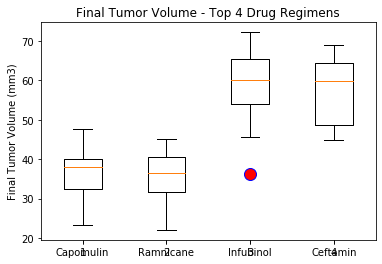

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume - Top 4 Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],["Capomulin", "Ramnicane", "Infubinol","Ceftamin"])
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='b')
plt.boxplot([Capomulin_final_tumor_df,Ramicane_final_tumor_df,Infubinol_final_tumor_df,Ceftamin_final_tumor_df],flierprops=flierprops)
plt.show()

# Line and scatter plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create dataframe for Capomulin

Capomulin_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


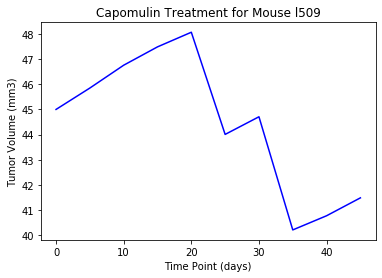

In [15]:
#Create capomulin dataframe for mouse l509
Capomulin_df_l509_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] =="l509"]

#Shrink dataframe down to Time Point and Tumor Volume data for mouse l509

Capomulin_df_l509_df = Capomulin_df_l509_df.loc[:,["Timepoint","Tumor Volume (mm3)"]]

#Identify Variables for Line Plot 

time_point=Capomulin_df_l509_df["Timepoint"]
tumor_volume = Capomulin_df_l509_df["Tumor Volume (mm3)"]

#Create Line Plot  for mouse l509

time_tumor, = plt.plot(time_point, tumor_volume, color="blue", label="Tumor Volume (mm3)" )


# Create Title and Axis Labels

plt.title("Capomulin Treatment for Mouse l509")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

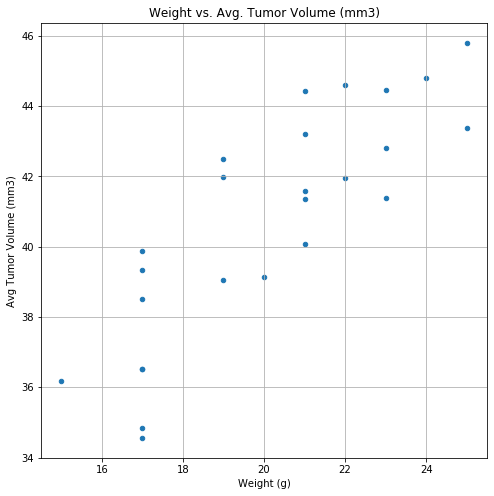

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Create dataframe with Mouse ID, Weight, and Tumor Volume

Capomulin_df_scatter = Capomulin_df.loc[:,["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
Capomulin_df_scatter

#Create new dataframe with  Mouse ID and Weight
mouse_weight = pd.DataFrame(Capomulin_df_scatter.groupby(["Mouse ID"])["Weight (g)"].mean())
mouse_weight

#Create new dataframe with  Mouse ID and Average Tumor Volume (and remame avg vol column)

mouse_avgtumor = pd.DataFrame(Capomulin_df_scatter.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean())
mouse_avgtumor = mouse_avgtumor.rename(columns={"Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"})

#Join both tables by Mouse ID
weight_avgtumor = pd.merge(mouse_weight, mouse_avgtumor, on="Mouse ID")
weight_avgtumor

weight_avgtumor.plot(kind="scatter", x="Weight (g)", y="Avg Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Weight vs. Avg. Tumor Volume (mm3)")

plt.show()

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Identify weight in dataframe
weight = weight_avgtumor.iloc[:,0]

#Identify Avg Tumor in dataframe
avg_tumor = weight_avgtumor.iloc[:,1]

#Calculate Correlation and create print statement
correlation = stats.pearsonr(weight,avg_tumor)
print(f"The correlation between weight and average tumor volume (mm3) is {round(correlation[0],2)}")

The correlation between weight and average tumor volume (mm3) is 0.84


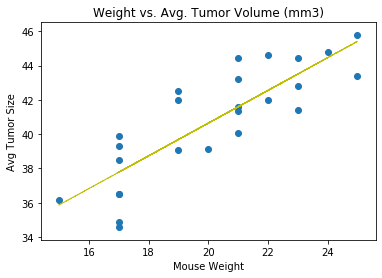

In [18]:
# Show the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Create variables for line regression equation

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(weight, avg_tumor)
vc_fit = vc_slope * weight + vc_int

#Create scatter plot and best fit line graph

plt.plot(weight,vc_fit,"--",linewidth=1, color="y")
plt.scatter(weight,avg_tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Size')
plt.title("Weight vs. Avg. Tumor Volume (mm3)")

plt.show()